<a href="https://colab.research.google.com/github/SahilCarterr/Ip_Adapter-Upscaling/blob/Code_Updates/ip_adpter_upscaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade diffusers accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

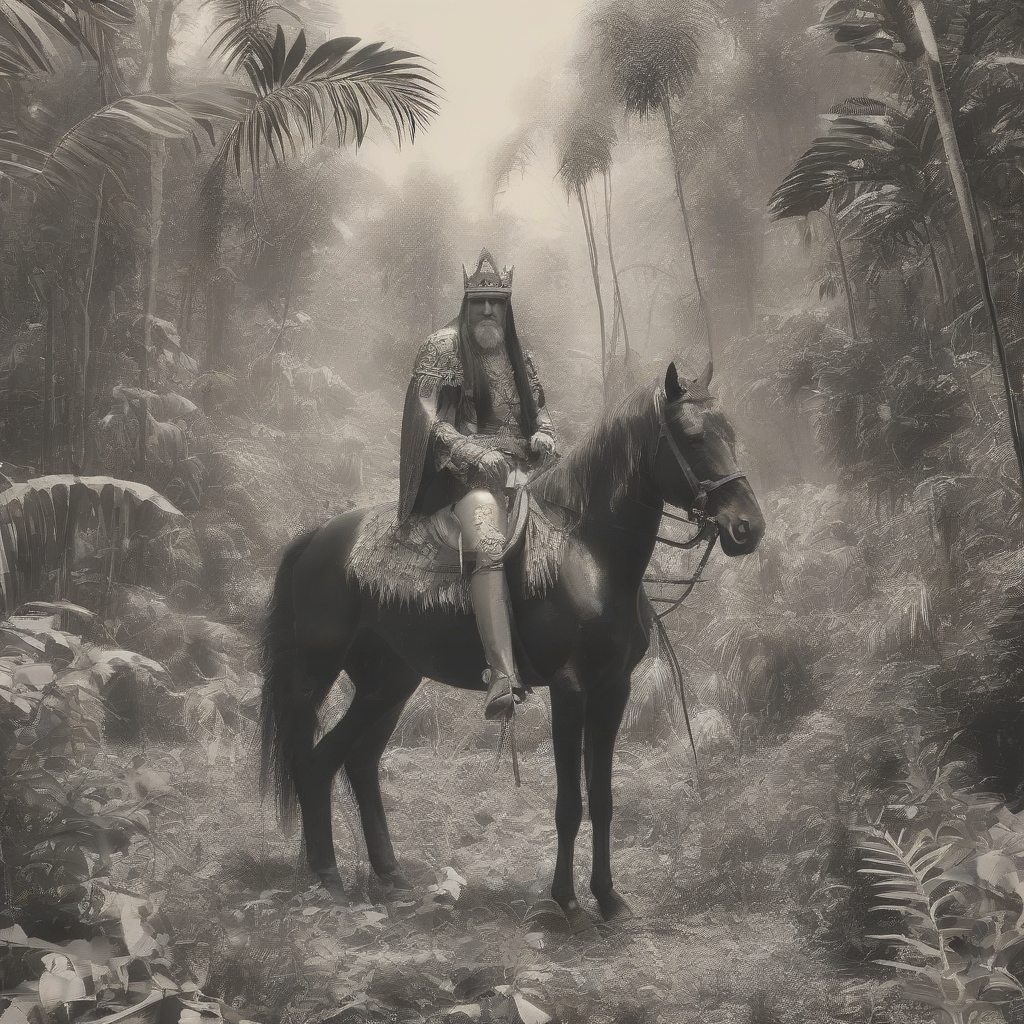

In [2]:
import torch
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                             torch_dtype=torch.float16, use_safetensors=True).to("cuda")
prompt = "king in a jungle on horse"
import torch
generator = torch.Generator("cuda").manual_seed(42)
pipeline.enable_attention_slicing()
image = pipeline(prompt, generator=generator, num_inference_steps=25).images[0]
image

In [3]:
import os
# Create a new directory
folder_name = "original"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
image.save("/content/original/panda.png")

In [4]:
from diffusers import AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin")
pipeline.set_ip_adapter_scale(0.6)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ip-adapter_sdxl.bin:   0%|          | 0.00/703M [00:00<?, ?B/s]

sdxl_models/image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

In [5]:
from PIL import Image

def divide_image_into_tiles(image_path, tile_size):
    # Open the image file
    with Image.open(image_path) as img:
        # Get the width and height of the image
        width, height = img.size

        # Calculate the number of tiles horizontally and vertically
        num_horizontal_tiles = width // tile_size[0]
        num_vertical_tiles = height // tile_size[1]

        tiles = []
        # Iterate over each tile
        for y in range(num_vertical_tiles):
            for x in range(num_horizontal_tiles):
                # Calculate the coordinates of the current tile
                left = x * tile_size[0]
                upper = y * tile_size[1]
                right = left + tile_size[0]
                lower = upper + tile_size[1]

                # Crop the tile
                tile = img.crop((left, upper, right, lower))
                tiles.append(tile)

        return tiles

# Example usage:
image_path = '/content/original/panda.png'  # Replace 'example.jpg' with the path to your image file
tile_size = (256, 256)  # Define the size of each tile (width x height)
tiles = divide_image_into_tiles(image_path, tile_size)

# Save or process each tile as needed
for i, tile in enumerate(tiles):
    tile.save(f'tile_{i}.jpg')  # Save each tile with a unique name

  0%|          | 0/100 [00:00<?, ?it/s]

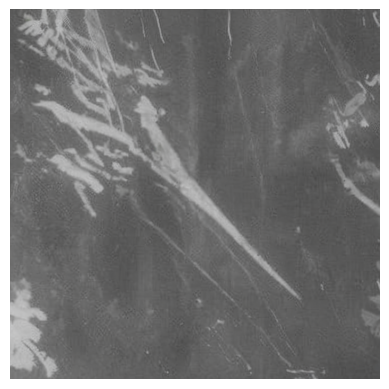

  0%|          | 0/100 [00:00<?, ?it/s]

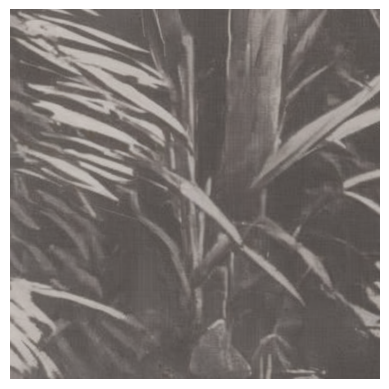

  0%|          | 0/100 [00:00<?, ?it/s]

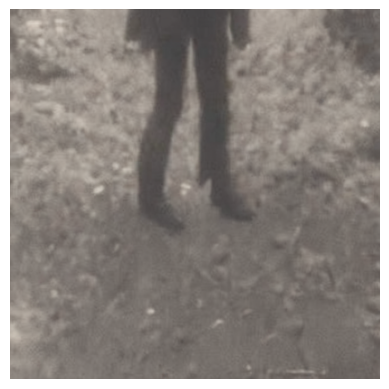

  0%|          | 0/100 [00:00<?, ?it/s]

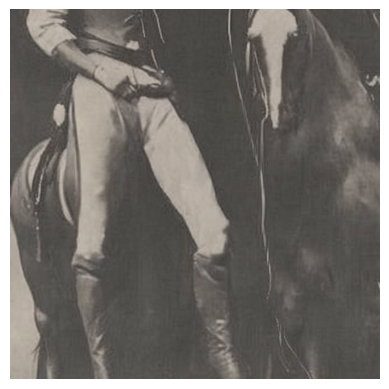

  0%|          | 0/100 [00:00<?, ?it/s]

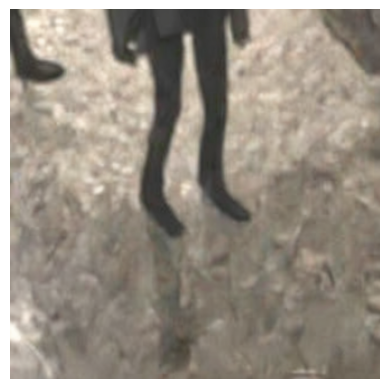

  0%|          | 0/100 [00:00<?, ?it/s]

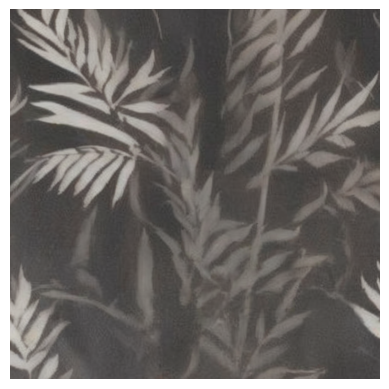

  0%|          | 0/100 [00:00<?, ?it/s]

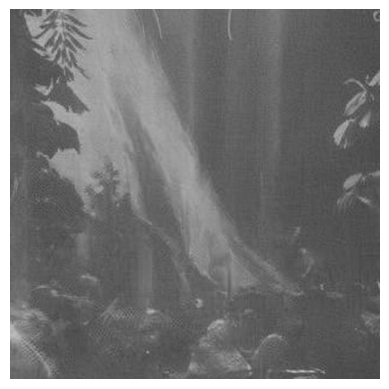

  0%|          | 0/100 [00:00<?, ?it/s]

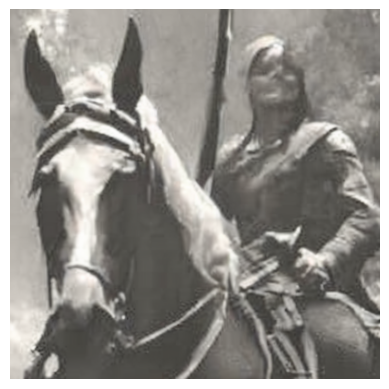

  0%|          | 0/100 [00:00<?, ?it/s]

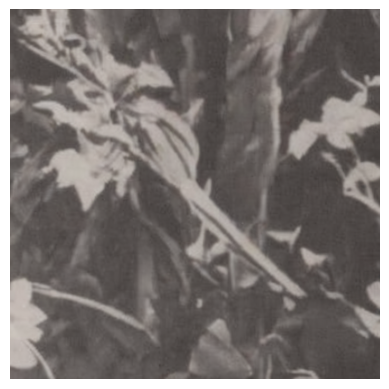

  0%|          | 0/100 [00:00<?, ?it/s]

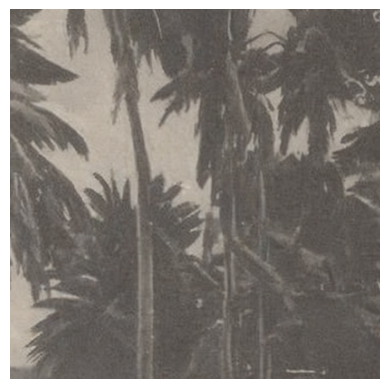

  0%|          | 0/100 [00:00<?, ?it/s]

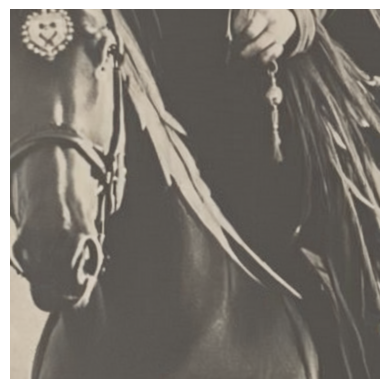

  0%|          | 0/100 [00:00<?, ?it/s]

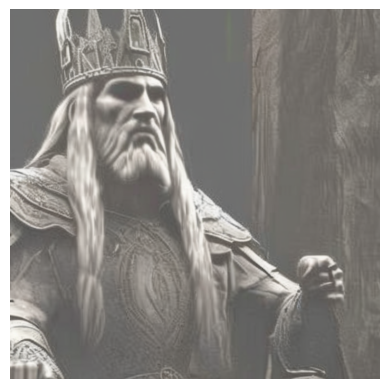

  0%|          | 0/100 [00:00<?, ?it/s]

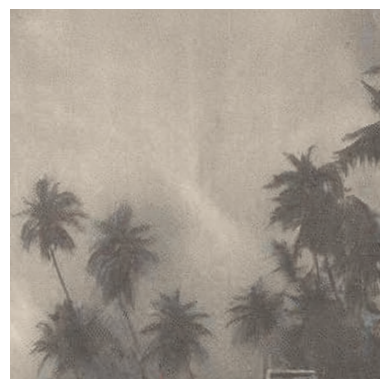

  0%|          | 0/100 [00:00<?, ?it/s]

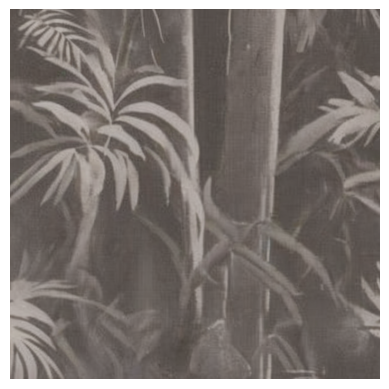

  0%|          | 0/100 [00:00<?, ?it/s]

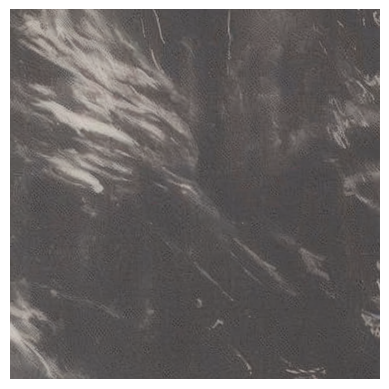

  0%|          | 0/100 [00:00<?, ?it/s]

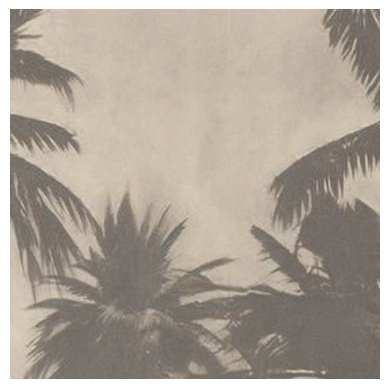

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
def iterate_files_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath):
            image_path = filepath
            image = Image.open(image_path)
            generator = torch.Generator(device="cuda").manual_seed(0)
            images = pipeline(
                prompt="high quality",
                ip_adapter_image=image,
                negative_prompt="",
                num_inference_steps=100,
                generator=generator,
            ).images
            if not os.path.exists("generated"):
                os.makedirs("generated")
            image_to_save = images[0]
            if not isinstance(image_to_save, Image.Image):
                image_to_save = Image.fromarray(image_to_save)


            image_to_save.save(f"generated/{filename}")
            plt.imshow(images[0])
            plt.axis("off")
            plt.show()
# Replace '/content' with your actual folder path
img_path = '/content'
iterate_files_in_folder(img_path)

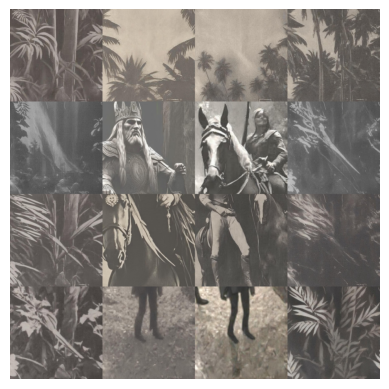

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load your images
image1 = cv2.imread('/content/generated/tile_0.jpg')
image2 = cv2.imread('/content/generated/tile_1.jpg')
image3 = cv2.imread('/content/generated/tile_2.jpg')
image4 = cv2.imread('/content/generated/tile_3.jpg')
image5 = cv2.imread('/content/generated/tile_4.jpg')
image6 = cv2.imread('/content/generated/tile_5.jpg')
image7 = cv2.imread('/content/generated/tile_6.jpg')
image8 = cv2.imread('/content/generated/tile_7.jpg')
image9 = cv2.imread('/content/generated/tile_8.jpg')
image10 = cv2.imread('/content/generated/tile_9.jpg')
image11 = cv2.imread('/content/generated/tile_10.jpg')
image12 = cv2.imread('/content/generated/tile_11.jpg')
image13 = cv2.imread('/content/generated/tile_12.jpg')
image14 = cv2.imread('/content/generated/tile_13.jpg')
image15 = cv2.imread('/content/generated/tile_14.jpg')
image16 = cv2.imread('/content/generated/tile_15.jpg')

# Concatenate images
row1 = np.concatenate((image1, image2, image3, image4), axis=1)
row2 = np.concatenate((image5, image6, image7, image8), axis=1)
row3 = np.concatenate((image9, image10, image11, image12), axis=1)
row4 = np.concatenate((image13, image14, image15, image16), axis=1)

# Stack rows vertically
final_image = np.vstack((row1, row2, row3, row4))


cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('merged_image.jpg', final_image)
plt.imshow(plt.imread('/content/merged_image.jpg'))
plt.axis('off')
plt.show()